Data cleaning from StreetEasy monthly rent data

In [27]:
import pandas as pd
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re
import matplotlib.pyplot as plot

In [2]:
import os
os.getcwd()

'/Users/evasibinga'

In [6]:
df = pd.read_csv("WWDdata/medianAskingRent_All.csv")

In [7]:
df.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,3950.0,4000.0,4095.0,4000.0,3995.0,4014.0,4095.0,4099.0,4081.0,4050.0
1,All Midtown,Manhattan,submarket,2875.0,2800.0,2800.0,2850.0,2895.0,2950.0,3000.0,...,3593.0,3643.0,3695.0,3718.0,3725.0,3711.0,3695.0,3740.0,3750.0,3754.0
2,All Upper East Side,Manhattan,submarket,2460.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2995.0,3000.0,3050.0,3067.0,2995.0,3000.0,3125.0,3250.0,3348.0,3300.0
3,All Upper Manhattan,Manhattan,submarket,1836.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2400.0,2450.0,2500.0,2500.0,2495.0,2441.0,2391.0,2350.0,2350.0,2395.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,3479.0,3495.0,3478.0,3425.0,3539.0,3650.0,3650.0,3695.0,3629.0,3700.0


In [53]:
id_vars = ["areaName", "Borough", "areaType"]

formatted_df = pd.melt(df,id_vars=id_vars,var_name="year-month",value_name="median_rent")
formatted_df = formatted_df.sort_values(ascending=True, by=["areaName", "year-month"])
formatted_df.rename(columns={'year-month':'year_month'}, inplace=True)
formatted_df[['year','month']] = formatted_df.year_month.str.split("-",expand=True) 

median_rent = formatted_df

formatted_df.to_csv('WWDdata/medianAskingRent_formatted.csv')
formatted_df.head()

,areaName,Borough,areaType,year_month,median_rent,year,month
0,All Downtown,Manhattan,submarket,2010-01,3200.0,2010,01
198,All Downtown,Manhattan,submarket,2010-02,3200.0,2010,02
396,All Downtown,Manhattan,submarket,2010-03,3025.0,2010,03
594,All Downtown,Manhattan,submarket,2010-04,3100.0,2010,04
792,All Downtown,Manhattan,submarket,2010-05,3100.0,2010,05


In [56]:
sort_by_rent_df = formatted_df.sort_values(ascending=True, by=["median_rent", "areaName", "year_month"])

sort_by_rent_df.to_csv('WWDdata/medianAskingRent_formatted_sortbyrent.csv')
sort_by_rent_df.head()

,areaName,Borough,areaType,year_month,median_rent,year,month
3293,Mott Haven,Bronx,neighborhood,2011-05,763.0,2011,05
3095,Mott Haven,Bronx,neighborhood,2011-04,926.0,2011,04
3491,Mott Haven,Bronx,neighborhood,2011-06,926.0,2011,06
2820,Corona,Queens,neighborhood,2011-03,950.0,2011,03
3018,Corona,Queens,neighborhood,2011-04,950.0,2011,04


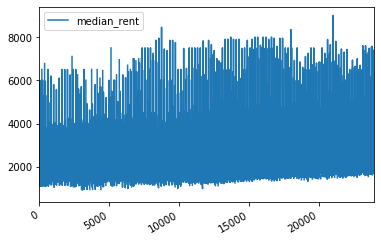

In [30]:
median_rent.plot.line()
plot.show()